In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob

In [18]:
# uitlity functions 

def average_payoff(t_fraction, theta):
    return theta * (1 - 2 * t_fraction) + 8 * (t_fraction + t_fraction * t_fraction)

def get_fname(**params):
    N = params['N']
    f_cultural = params['f_cultural']
    theta_list = params['theta_list']
    beta = params['beta']
    max_steps = params['max_steps']
    ensemble_size = params['ensemble_size']
    update_fraction = params['update_fraction']
    seed = params.get('seed')
    # convert theta_list to string
    theta_list = [str(theta) for theta in theta_list]
    theta_list = '_'.join(theta_list)
    # use fp to format the string

    seed_str = 'none' if seed is None else str(seed)
    fname = f"data_N_{N}_f_cultural_{f_cultural}_theta_list_{theta_list}_beta_{beta:.3f}_max_steps_{max_steps}_ensemble_size_{ensemble_size}_update_fraction_{update_fraction:.3f}_seed_{seed_str}.pkl"
    return fname
    

def load_data(N, f_cultural, theta_list, beta, max_steps, ensemble_size, update_fraction, seed):
    fname = get_fname(N=N, f_cultural=f_cultural, theta_list=theta_list, beta=beta, max_steps=max_steps, ensemble_size=ensemble_size, update_fraction=update_fraction, seed=seed)
    try:    
        with open(f"../results/data/{fname}", 'rb') as f:
            data = pickle.load(f)
    except FileNotFoundError:
        print(f"File {fname} not found")
    return data


def expected_payoffs(data):
    expected_payoff = []
    for game_index in data:
        average_payoff_ensemble = []
        for ensemble in data[game_index]:
            strategies = np.array(data[game_index][ensemble]['strategies'])
            mapped_matrix = np.where(strategies == 'T', 1, 0)
            fraction_t = np.mean(mapped_matrix, axis=0)
            average_payoff_ensemble.append(average_payoff(fraction_t, theta))

        average_payoff_ensemble = np.array(average_payoff_ensemble)
        expected_payoff.extend(np.mean(average_payoff_ensemble, axis=0))
    return np.array(expected_payoff)

# for each time step, calculate the expected fraction of T
def expected_t_fractions(data):
   expected_t_fraction = []
   for game_index in data:
        ensembles_fractions = []
        for ensemble in data[game_index]:
            strategies = np.array(data[game_index][ensemble]['strategies'])
            mapped_matrix = np.where(strategies == 'T', 1, 0)
            fraction_t = np.mean(mapped_matrix, axis=0)
            ensembles_fractions.append(fraction_t)

        ensembles_fractions = np.array(ensembles_fractions)
        mean_ensembles_fractions = np.mean(ensembles_fractions, axis=0)
        expected_t_fraction.extend(mean_ensembles_fractions)

   return np.array(expected_t_fraction)


def final_expected_t_fraction(data):
    final_fractions = []
    for game_index in data:
        final_ensembles_fractions = []
        for ensemble in data[game_index]:
            final_strategies = np.array(data[game_index][ensemble]['strategies'])[:, -1]
            mapped_final_strategies = np.where(final_strategies == 'T', 1, 0)
            fraction_t = np.mean(mapped_final_strategies)
            final_ensembles_fractions.append(fraction_t)
        ensembles_fractions = np.array(final_ensembles_fractions)
        mean_final_ensembles_fractions = np.mean(final_ensembles_fractions)
        final_fractions.append(mean_final_ensembles_fractions)
    return np.array(final_fractions)
    

In [ ]:
N = 1000
f_cultural = 3 / 4
theta_list_1 = [1, 3, 15]
theta_list_2 = [1, 13, 15]
theta_list_3 = [15, 1, 13]
beta = 0.1
max_steps = 50
ensemble_size = 100
update_fraction = 0.1
seed = 42

data_1 =  load_data(N, f_cultural, theta_list_1, beta, max_steps, ensemble_size, update_fraction, seed)
data_2 =  load_data(N, f_cultural, theta_list_2, beta, max_steps, ensemble_size, update_fraction, seed)
data_3 =  load_data(N, f_cultural, theta_list_3, beta, max_steps, ensemble_size, update_fraction, seed)

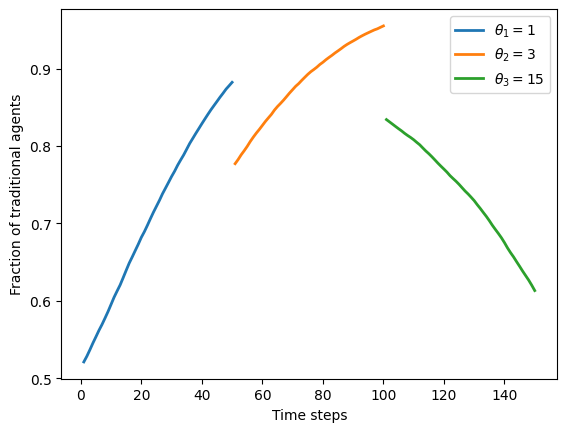

In [5]:
t_fractions = expected_t_fractions(data_1)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_1[i]}$", lw=2)


plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
plt.savefig(f"../results/figs/t_fractions_{"_".join(map(str, theta_list_1))}.png", dpi=300, bbox_inches='tight', )
plt.show()

    

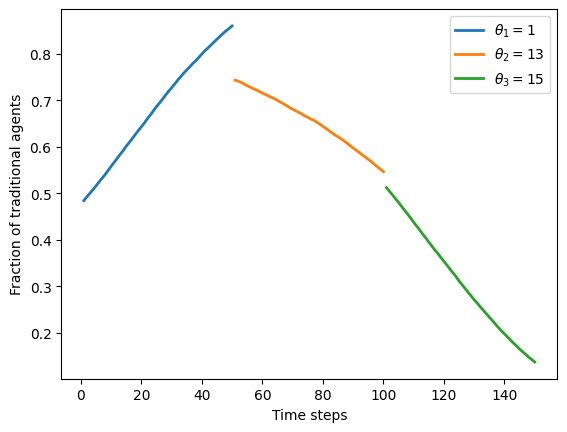

In [6]:
t_fractions = expected_t_fractions(data_2)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_2[i]}$", lw=2)

plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
plt.savefig(f"../results/figs/t_fractions_{"_".join(map(str, theta_list_2))}.png", dpi=300, bbox_inches='tight')
plt.show()

    

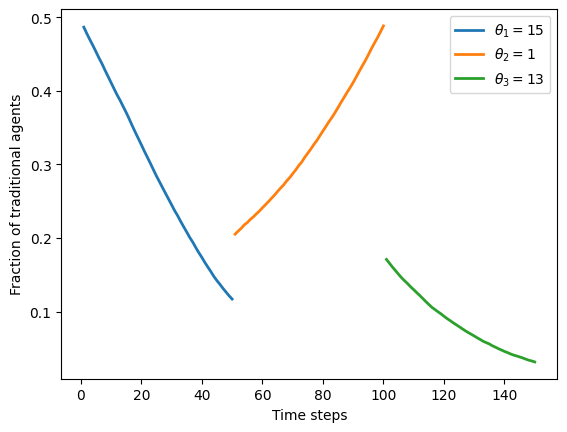

In [7]:
t_fractions = expected_t_fractions(data_3)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_3[i]}$", lw=2)

plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
plt.savefig(f"../results/figs/t_fractions_{"_".join(map(str, theta_list_3))}.png", dpi=300, bbox_inches='tight')
plt.show()

    

[0.51625 0.524   0.53201 0.54044 0.54867 0.5571  0.56566 0.57496 0.58385
 0.59198 0.60066 0.60916 0.61729 0.62498 0.63336 0.6423  0.65033 0.65863
 0.66665 0.6747  0.68323 0.69113 0.69979 0.70833 0.71591 0.72367 0.7316
 0.73864 0.74615 0.75405 0.76118 0.76794 0.77553 0.78291 0.78937 0.79632
 0.80251 0.80868 0.81572 0.82263 0.8287  0.83498 0.84117 0.84624 0.85197
 0.8574  0.86319 0.86877 0.8739  0.87883]
[0.51625 0.524   0.53201 0.54044 0.54867 0.5571  0.56566 0.57496 0.58385
 0.59198 0.60066 0.60916 0.61729 0.62498 0.63336 0.6423  0.65033 0.65863
 0.66665 0.6747  0.68323 0.69113 0.69979 0.70833 0.71591 0.72367 0.7316
 0.73864 0.74615 0.75405 0.76118 0.76794 0.77553 0.78291 0.78937 0.79632
 0.80251 0.80868 0.81572 0.82263 0.8287  0.83498 0.84117 0.84624 0.85197
 0.8574  0.86319 0.86877 0.8739  0.87883]


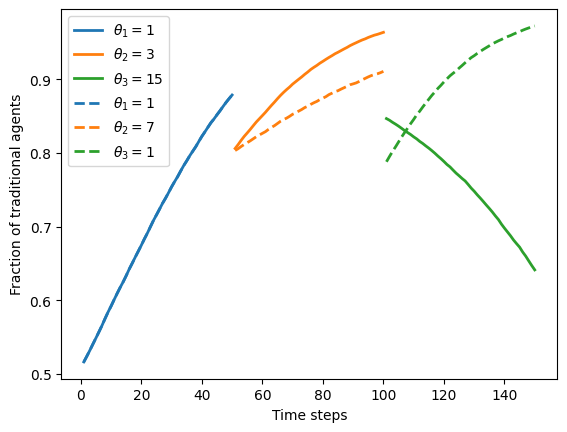

In [20]:
# combine data data from game 1 and game 2

colors = ['tab:blue', 'tab:orange', 'tab:green']
# game 2
t_fractions = expected_t_fractions(data_1)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    if i == 0:
        print(t_fractions[i * 50 : (i + 1) * 50])
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_1[i]}$", lw=2, color=colors[i])

# game 3
t_fractions = expected_t_fractions(data_2)
time_steps = np.arange(1, len(t_fractions) + 1)

for i in range(3):
    if i == 0:
        print(t_fractions[i * 50 : (i + 1) * 50])
    plt.plot(time_steps[i * 50 : (i + 1) * 50], t_fractions[i * 50 : (i + 1) * 50], label=f"$\\theta_{i + 1} = {theta_list_2[i]}$", lw=2, ls='--', color=colors[i])

plt.xlabel("Time steps")
plt.ylabel("Fraction of traditional agents")
plt.legend()
# plt.savefig(f"../results/figs/t_fractions_{"_".join(map(str, theta_list_1 + theta_list_2))}.png", dpi=300, bbox_inches='tight')
plt.show()

    
